<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [6]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [7]:
# Configure pandas to not truncate columns when printing
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent the DataFrame from expanding into multiple lines
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Automatically adjust display width
pd.set_option('display.max_colwidth', None)  # Maximum column width without truncation

# Configure pandas to not display scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)  # Display numbers with two decimal places

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [8]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.96,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.00,0,B0003,-80.58,28.56,0
1,2,2012-05-22,Falcon 9,525.00,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.00,0,B0005,-80.58,28.56,0
2,3,2013-03-01,Falcon 9,677.00,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.00,0,B0007,-80.58,28.56,0
3,4,2013-09-29,Falcon 9,500.00,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.00,0,B1003,-120.61,34.63,0
4,5,2013-12-03,Falcon 9,3170.00,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.00,0,B1004,-80.58,28.56,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


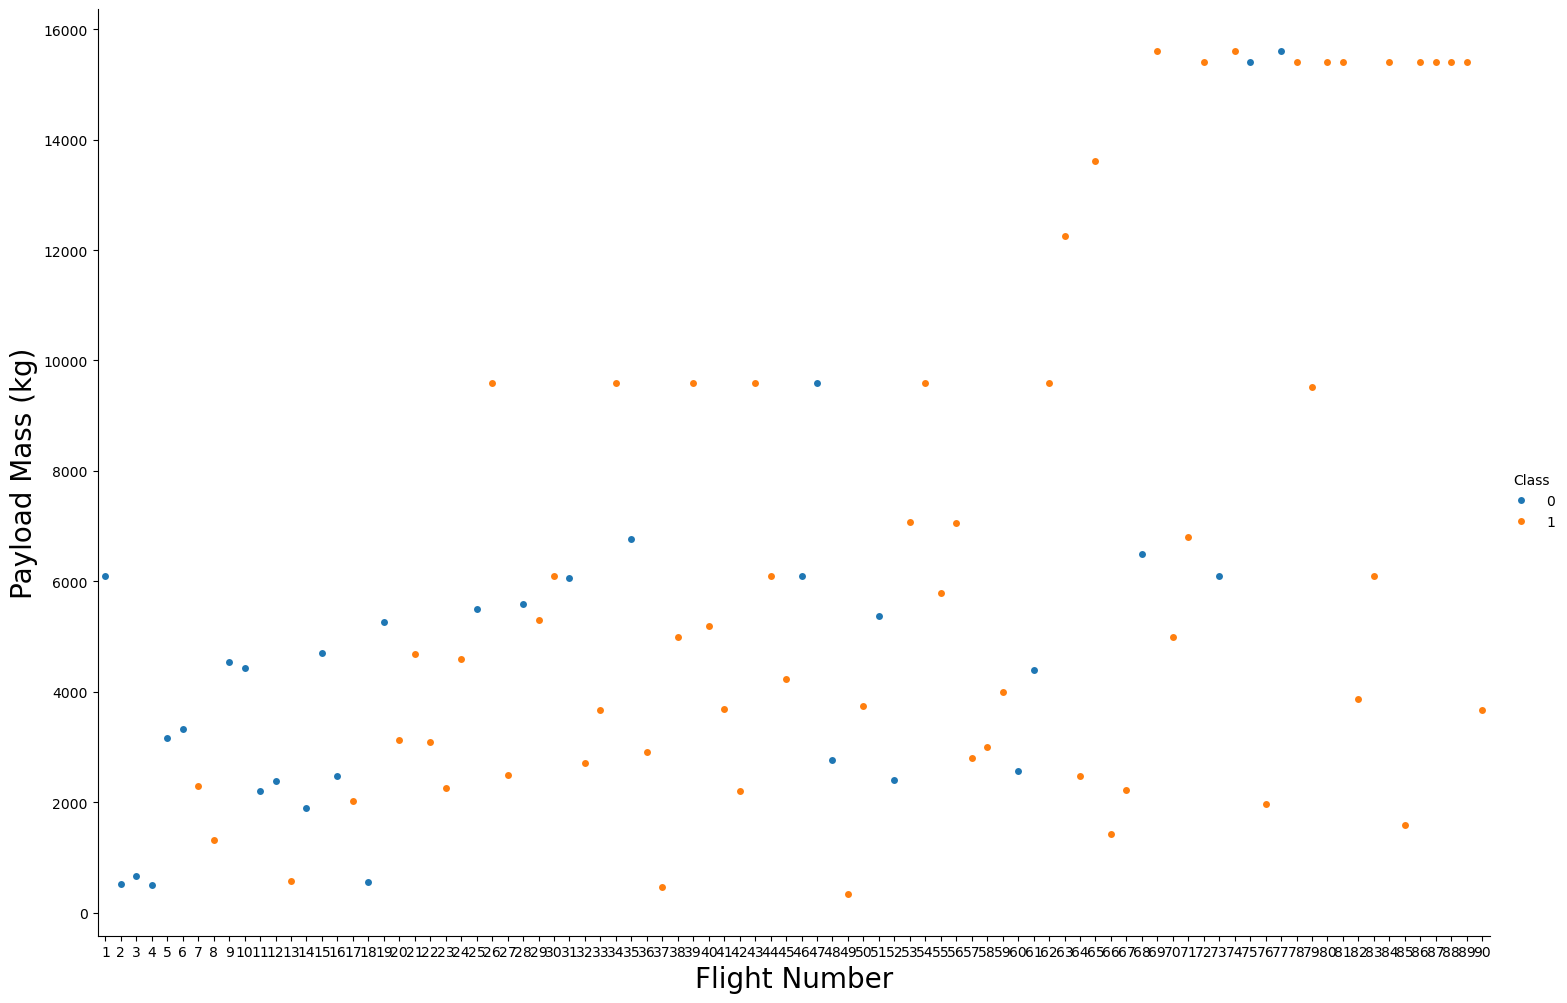

In [9]:
# El código usa el gráfico catplot de seaborn. 
# El método catplot() es útil para mostrar gráficos de datos categóricos, como boxplots, violín, etc.
# En este caso, el gráfico utilizado por defecto es un "scatterplot" (gráfico de dispersión) o un gráfico de puntos.

sns.catplot(
    y="PayloadMass",  # Variable dependiente: "PayloadMass" que representa la masa de la carga útil (en kg)
    x="FlightNumber",  # Variable independiente: "FlightNumber" que representa el número de vuelo
    hue="Class",  # Variable para diferenciar colores: "Class" que categoriza el tipo de vuelo (por ejemplo, lanzamientos exitosos o fallidos)
    data=df,  # El DataFrame que contiene los datos a graficar
    height=10,     # altura en pulgadas
    aspect=1.5     # relación de aspecto (ancho = height * aspect)
)

# Configuración de la etiqueta del eje X, indicando que representa el número de vuelo
plt.xlabel("Flight Number", fontsize=20)  # Se ajusta el tamaño de la fuente a 20 para que sea legible

# Configuración de la etiqueta del eje Y, indicando que representa la masa de carga útil (en kg)
plt.ylabel("Payload Mass (kg)", fontsize=20)  # Se ajusta el tamaño de la fuente a 20 para mejorar la visualización

# Mostrar el gráfico generado
plt.show()  # Se visualiza el gráfico creado


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


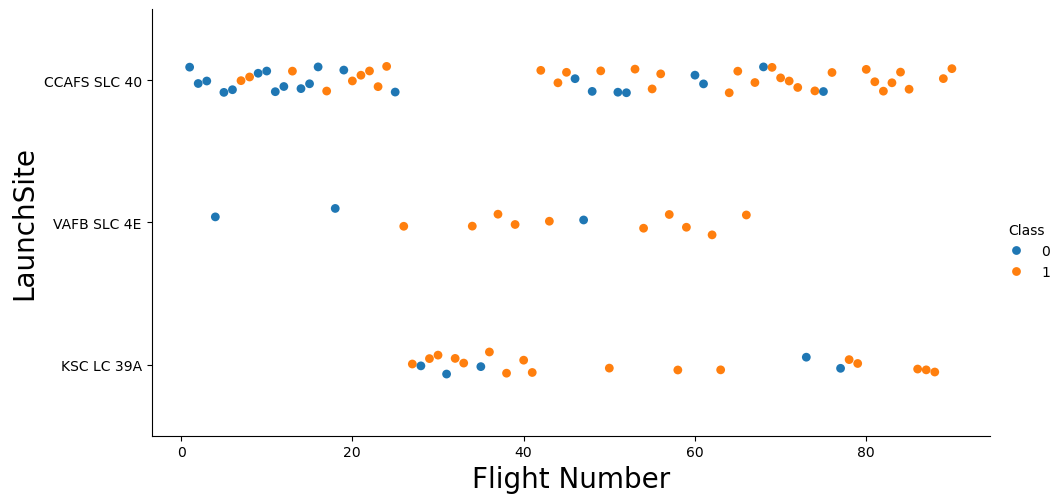

In [10]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
df.head()
sns.catplot(
	data=df,
	x='FlightNumber',
	y='LaunchSite',
	hue='Class',
	kind='strip',  # Ensures a scatter plot
	height=5,     # Height in inches
	aspect=2,    # Aspect ratio (width = height * aspect)
	s=40       # Increases the size of the points
)
            
# Configuración de la etiqueta del eje X, indicando que representa el número de vuelo
plt.xlabel("Flight Number", fontsize=20)  # Se ajusta el tamaño de la fuente a 20 para que sea legible
# Configuración de la etiqueta del eje Y, indicando que representa la masa de carga útil (en kg)
plt.ylabel("LaunchSite", fontsize=20)  # Se ajusta el tamaño de la fuente a 20 para mejorar la visualización
# Mostrar el gráfico generado
plt.show()  # Se visualiza el gráfico creado

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


In [11]:
# VAFB SLC 4E	0.769231 es el segundo lugar con porcentaje de lanzamientos echos con exito con un 76 porcineto de exito
#con un total de 13 lanzmientos 

#KSC LC 39A	0.772727 el lugar con el amyor promedio de lanszamientos exitosos con un  0.77% con 22 lanzamientos en total
# 17 con exito y 5  lanzamientos no exitosos


#CCAFS SLC 40 ocupa el lugar con mas baja de las lanzamientos exitoso con una taza de 0.60%
# y un total de lanzamientos de 55 con lanåmientos extitosos 


In [12]:
# Calculate the mean (average) of the 'Class' column for each LaunchSite
result_option1 = df.groupby("LaunchSite")['Class'].mean().reset_index(name="Promedio")

display(result_option1)

result_option2 = df.groupby("LaunchSite")['Class'].value_counts()
display (result_option2)

,LaunchSite,Promedio
0,CCAFS SLC 40,0.60
1,KSC LC 39A,0.77
2,VAFB SLC 4E,0.77


LaunchSite    Class
CCAFS SLC 40  1        33
              0        22
KSC LC 39A    1        17
              0         5
VAFB SLC 4E   1        10
              0         3
Name: count, dtype: int64

### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


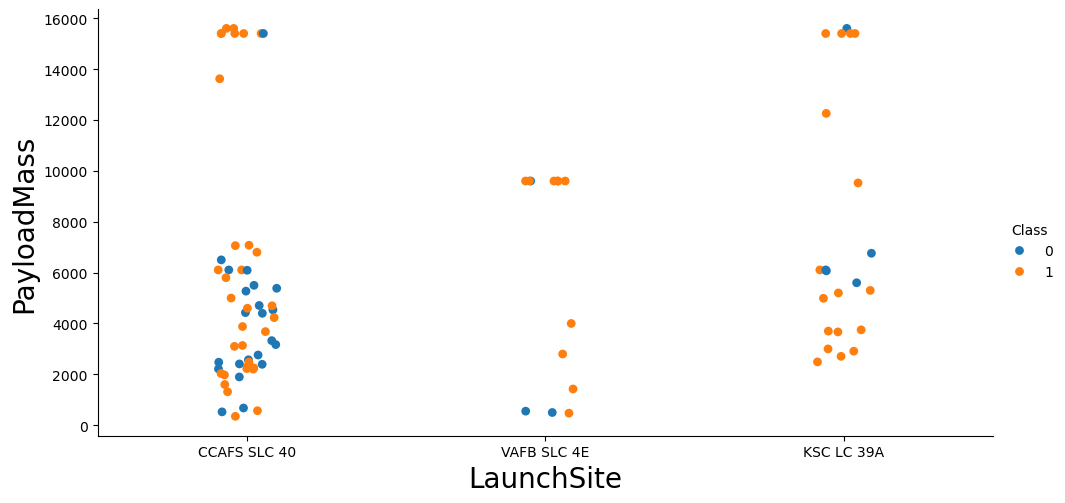

In [13]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

df.head()
sns.catplot(
	data=df,
	x='LaunchSite',
	y='PayloadMass',
	hue='Class',
	#kind='strip',  # Ensures a scatter plot
	height=5,     # Height in inches
	aspect=2,    # Aspect ratio (width = height * aspect)
	s=40       # Increases the size of the points
)
            
# Configuración de la etiqueta del eje X, indicando que representa el número de vuelo
plt.xlabel("LaunchSite", fontsize=20)  # Se ajusta el tamaño de la fuente a 20 para que sea legible
# Configuración de la etiqueta del eje Y, indicando que representa la masa de carga útil (en kg)
plt.ylabel("PayloadMass", fontsize=20)  # Se ajusta el tamaño de la fuente a 20 para mejorar la visualización
# Mostrar el gráfico generado
plt.show()  # Se visualiza el gráfico creado


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


,Orbit,Success Rate
0,ES-L1,1.00
1,GEO,1.00
2,GTO,0.52
3,HEO,1.00
4,ISS,0.62
5,LEO,0.71
6,MEO,0.67
7,PO,0.67
8,SO,0.00
9,SSO,1.00


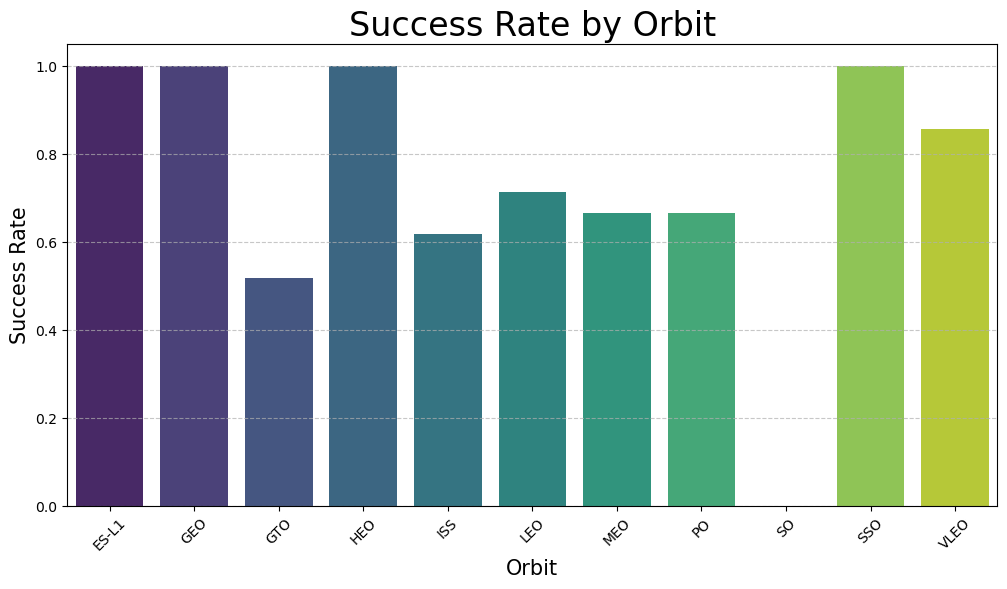

In [ ]:
# Agrupamos el DataFrame 'df' por la columna "Orbit" y calculamos la tasa de éxito promedio en cada órbita.
# Se supone que la columna "Class" tiene valores numéricos (por ejemplo, 1 para éxito y 0 para fallo).
# Se utiliza reset_index() para convertir la Serie resultante en un DataFrame y se renombra la columna a "Success Rate".
orbit_succes_rate = df.groupby("Orbit")["Class"].mean().reset_index(name="Success Rate")

# Usamos display para mostrar el DataFrame 'orbit_succes_rate' de forma enriquecida en entornos interactivos (como Jupyter Notebook).
display(orbit_succes_rate)

# Se crea una figura de matplotlib con un tamaño personalizado de 12 pulgadas de ancho por 6 de alto.
plt.figure(figsize=(12,6))

# Se genera un gráfico de barras con Seaborn para visualizar la tasa de éxito por cada órbita.
sns.barplot(
    data=orbit_succes_rate,  # DataFrame que contiene los datos agrupados
    x='Orbit',               # Eje X: Tipo de órbita
    y='Success Rate',        # Eje Y: Tasa de éxito (promedio de "Class")
    hue='Orbit',             # Se utiliza "Orbit" también para asignar colores distintos a cada barra
    palette="viridis",       # Paleta de colores "viridis" para un aspecto visual atractivo
    dodge=False              # Evita que las barras se separen por la variable 'hue'; se agrupan en una sola barra por órbita
)

# Configuración del eje X: Se etiqueta y se ajusta el tamaño de la fuente.
plt.xlabel("Orbit", fontsize=15)

# Configuración del eje Y: Se etiqueta y se ajusta el tamaño de la fuente.
plt.ylabel("Success Rate", fontsize=15)

# Se añade un título descriptivo al gráfico.
plt.title("Success Rate by Orbit", fontsize=24)

# Se rotan las etiquetas del eje X 45 grados y se ajusta el tamaño de la fuente para mejorar la legibilidad.
plt.xticks(rotation=45, fontsize=10)

# Se ajusta el tamaño de las etiquetas del eje Y.
plt.yticks(fontsize=10)

# Se añade una cuadrícula en el eje Y con líneas discontinuas y una transparencia del 70% para facilitar la interpretación visual.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Se muestra el gráfico final.
plt.show()


Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


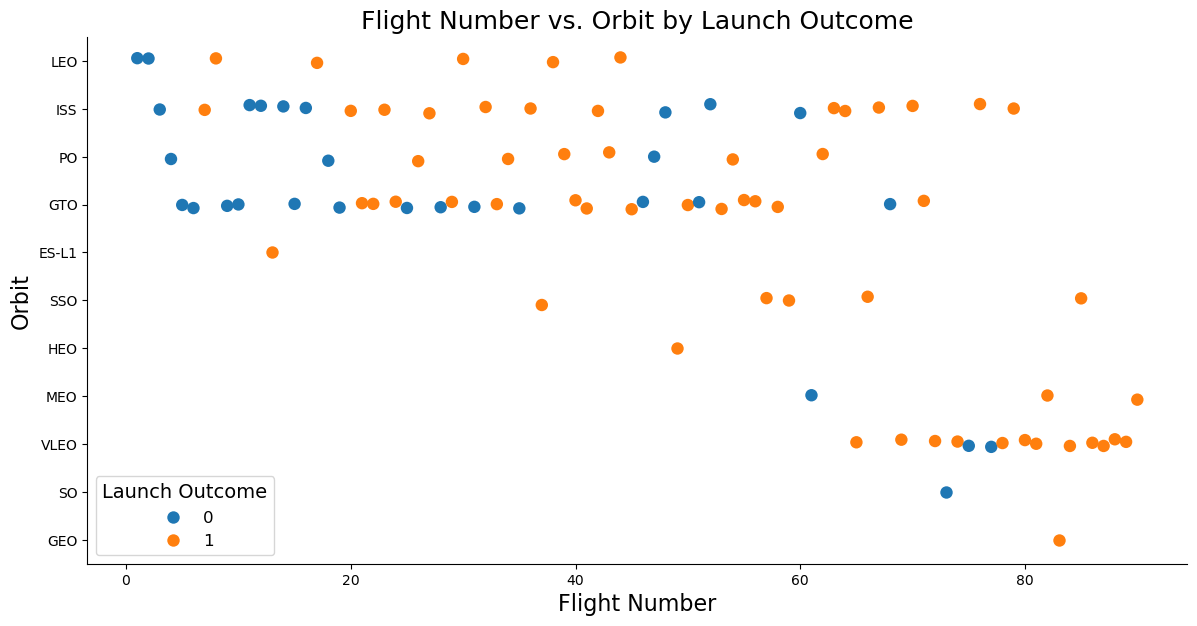

In [15]:
# Se crea un gráfico tipo "strip" utilizando catplot para visualizar la relación entre el número de vuelo,
# la órbita objetivo y el resultado del lanzamiento.
g = sns.catplot(
	data=df,
	kind='strip',        # Utilizamos "strip" para obtener un scatter plot de puntos dispersos
	x='FlightNumber',    # Eje X: Número de vuelo (indica el orden o intento del lanzamiento)
	y='Orbit',           # Eje Y: Órbita a la que se dirige la carga (variable categórica)
	hue='Class',         # Color de los puntos según la clase (por ejemplo, 1 = éxito, 0 = fallo)
	height=6,            # Altura del gráfico en pulgadas
	aspect=2,            # Relación de aspecto: ancho = height * aspect (en este caso 12 pulgadas)
	s=80,                # Tamaño de los marcadores para facilitar su visualización
	jitter=True          # Se habilita jitter para reducir el solapamiento de puntos en ejes categóricos
)

# Eliminar la leyenda duplicada
g._legend.remove()

# Se configuran las etiquetas de los ejes y se agrega un título descriptivo al gráfico
plt.xlabel("Flight Number", fontsize=16)  
plt.ylabel("Orbit", fontsize=16)
plt.title("Flight Number vs. Orbit by Launch Outcome", fontsize=18)

# Se ajusta la leyenda para clarificar el significado de los colores (resultado de lanzamiento)
plt.legend(title="Launch Outcome", fontsize=12, title_fontsize=14)

# Se muestra el gráfico final
plt.show()



You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


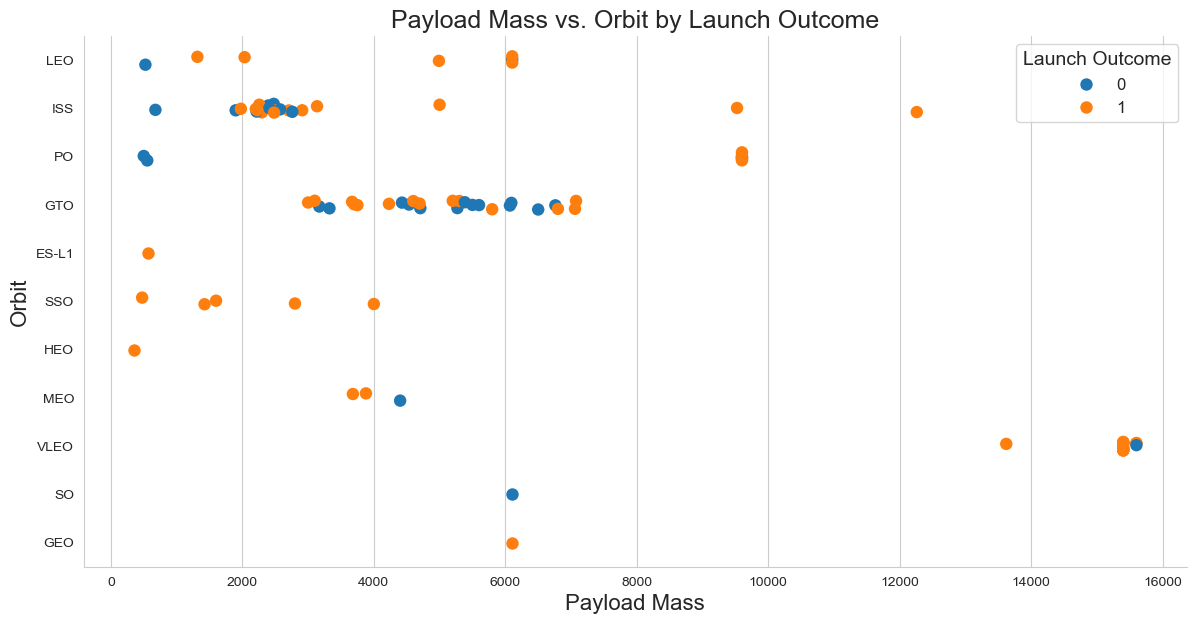

In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

# Se crea un gráfico tipo "strip" utilizando catplot para visualizar la relación entre el número de vuelo,
# la órbita objetivo y el resultado del lanzamiento.
g = sns.catplot(
	data=df,
	kind='strip',        # Utilizamos "strip" para obtener un scatter plot de puntos dispersos
	x='PayloadMass',    # Eje X: Número de vuelo (indica el orden o intento del lanzamiento)
	y='Orbit',           # Eje Y: Órbita a la que se dirige la carga (variable categórica)
	hue='Class',         # Color de los puntos según la clase (por ejemplo, 1 = éxito, 0 = fallo)
	height=6,            # Altura del gráfico en pulgadas
	aspect=2,            # Relación de aspecto: ancho = height * aspect (en este caso 12 pulgadas)
	s=80,                # Tamaño de los marcadores para facilitar su visualización
	jitter=True          # Se habilita jitter para reducir el solapamiento de puntos en ejes categóricos
)

# Eliminar la leyenda duplicada
g._legend.remove()

# Se configuran las etiquetas de los ejes y se agrega un título descriptivo al gráfico
plt.xlabel("Flight Number", fontsize=16)  
plt.ylabel("Orbit", fontsize=16)
plt.title("Flight Number vs. Orbit by Launch Outcome", fontsize=18)

# Se ajusta la leyenda para clarificar el significado de los colores (resultado de lanzamiento)
plt.legend(title="Launch Outcome", fontsize=12, title_fontsize=14)

# Se muestra el gráfico final
plt.show()





With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [18]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
        
    return year


Extract_year(df["Date"])

year = pd.to_numeric(year, errors='coerce')
year[0:5]

array([2010, 2012, 2013, 2013, 2013])

   Year  Average Success Rate
0  2010                  0.00
1  2012                  0.00
2  2013                  0.00
3  2014                  0.33
4  2015                  0.33
5  2016                  0.62
6  2017                  0.83
7  2018                  0.61
8  2019                  0.90
9  2020                  0.84


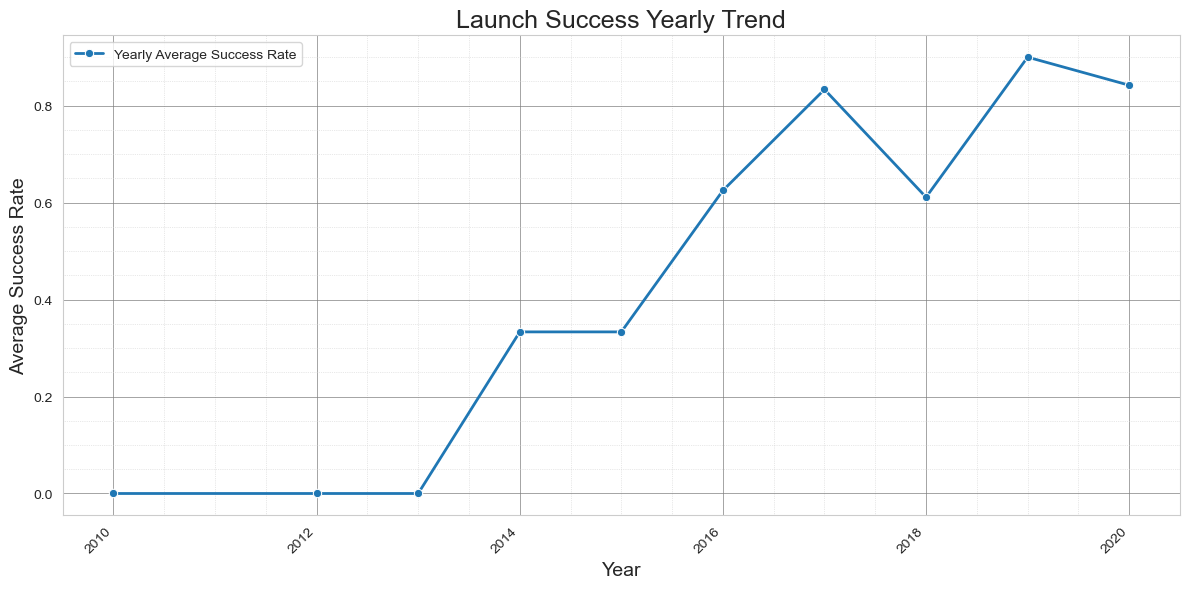

In [43]:

# Es útil importar esto para posibles ajustes de formato/localización de fechas/números
import matplotlib.ticker as mticker

# Asumiendo que 'df' es tu DataFrame inicial
# Y que la columna 'Class' es 1 para éxito y 0 para fallo.

# 1. Asegurar que la columna 'Date' es de tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# 2. Calcular la tasa de éxito promedio anual
#    - Agrupar por año extraído de la columna 'Date'
#    - Calcular la media de 'Class' para cada año
#    - Resetear el índice para obtener un DataFrame
#    - Renombrar columnas para mayor claridad
success_rate_yearly = df.groupby(df['Date'].dt.year)['Class'].mean().reset_index()
success_rate_yearly = success_rate_yearly.rename(columns={'Date': 'Year', 'Class': 'Average Success Rate'})

# Opcional: Ver el DataFrame resultante
print(success_rate_yearly)

# 3. Visualizar la tendencia
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Graficar usando los nombres de columna correctos
ax = sns.lineplot(
    data=success_rate_yearly,
    x='Year',                 # Eje X es el Año
    y='Average Success Rate', # Eje Y es la tasa promedio
    marker='o',
    linewidth=2,
    label="Yearly Average Success Rate"
)

# Configurar título y etiquetas claras
plt.title('Launch Success Yearly Trend', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Success Rate', fontsize=14)

# Formatear los ticks del eje X
# Opción 1: Simple rotación (Matplotlib/Seaborn elegirán los ticks)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Opción 2: Asegurar un tick para cada año en nuestros datos
# plt.xticks(ticks=success_rate_yearly['Year'], rotation=45, ha='right', fontsize=10)

# Opción 3: Asegurar que los ticks sean enteros (bueno para años)
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(rotation=45, ha='right', fontsize=10) # Aún necesitas rotar

# Activar cuadrícula y ticks menores
plt.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(True, which='minor', linestyle=':', linewidth='0.5', color='lightgray')
ax.minorticks_on() # Llamar sobre el objeto Axes

# Ajustar layout y mostrar
plt.legend()
plt.tight_layout()
plt.show()



You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [20]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.96,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.00,0,B0003
1,2,525.00,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.00,0,B0005
2,3,677.00,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.00,0,B0007
3,4,500.00,PO,VAFB SLC 4E,1,False,False,False,NaN,1.00,0,B1003
4,5,3170.00,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.00,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [40]:
# HINT: Use get_dummies() function on the categorical columns
list=features[["Orbit","LaunchSite","LandingPad","Serial"]]

features_one_hot = pd.get_dummies(
	features,
	columns=["Orbit", "LaunchSite", "LandingPad", "Serial"],
	prefix='ht_enco',
	prefix_sep='-'
)
features_one_hot.head()



,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,ht_enco-ES-L1,ht_enco-GEO,ht_enco-GTO,ht_enco-HEO,ht_enco-ISS,ht_enco-LEO,ht_enco-MEO,ht_enco-PO,ht_enco-SO,ht_enco-SSO,ht_enco-VLEO,ht_enco-CCAFS SLC 40,ht_enco-KSC LC 39A,ht_enco-VAFB SLC 4E,ht_enco-5e9e3032383ecb267a34e7c7,ht_enco-5e9e3032383ecb554034e7c9,ht_enco-5e9e3032383ecb6bb234e7ca,ht_enco-5e9e3032383ecb761634e7cb,ht_enco-5e9e3033383ecbb9e534e7cc,ht_enco-B0003,ht_enco-B0005,ht_enco-B0007,ht_enco-B1003,ht_enco-B1004,ht_enco-B1005,ht_enco-B1006,ht_enco-B1007,ht_enco-B1008,ht_enco-B1010,ht_enco-B1011,ht_enco-B1012,ht_enco-B1013,ht_enco-B1015,ht_enco-B1016,ht_enco-B1017,ht_enco-B1018,ht_enco-B1019,ht_enco-B1020,ht_enco-B1021,ht_enco-B1022,ht_enco-B1023,ht_enco-B1025,ht_enco-B1026,ht_enco-B1028,ht_enco-B1029,ht_enco-B1030,ht_enco-B1031,ht_enco-B1032,ht_enco-B1034,ht_enco-B1035,ht_enco-B1036,ht_enco-B1037,ht_enco-B1038,ht_enco-B1039,ht_enco-B1040,ht_enco-B1041,ht_enco-B1042,ht_enco-B1043,ht_enco-B1044,ht_enco-B1045,ht_enco-B1046,ht_enco-B1047,ht_enco-B1048,ht_enco-B1049,ht_enco-B1050,ht_enco-B1051,ht_enco-B1054,ht_enco-B1056,ht_enco-B1058,ht_enco-B1059,ht_enco-B1060,ht_enco-B1062
0,1,6104.96,1,False,False,False,1.00,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,525.00,1,False,False,False,1.00,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,677.00,1,False,False,False,1.00,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,500.00,1,False,False,False,1.00,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,3170.00,1,False,False,False,1.00,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [41]:
# HINT: use astype function
features_one_hot=features_one_hot.astype("float64")
features_one_hot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   FlightNumber                      90 non-null     float64
 1   PayloadMass                       90 non-null     float64
 2   Flights                           90 non-null     float64
 3   GridFins                          90 non-null     float64
 4   Reused                            90 non-null     float64
 5   Legs                              90 non-null     float64
 6   Block                             90 non-null     float64
 7   ReusedCount                       90 non-null     float64
 8   ht_enco-ES-L1                     90 non-null     float64
 9   ht_enco-GEO                       90 non-null     float64
 10  ht_enco-GTO                       90 non-null     float64
 11  ht_enco-HEO                       90 non-null     float64
 12  ht_enco-IS

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [44]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
